### API SEQUENTIAL

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_ful, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 3s 1us/step


In [6]:
X_train_ful.shape

(60000, 28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
X_train_ful.dtype

dtype('uint8')

### Validation Score et Train score

In [11]:
X_val = X_train_ful[:5000]/255
X_train = X_train_ful[5000:]/255

In [12]:
X_val.shape

(5000, 28, 28)

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_val.shape

(5000, 28, 28)

In [15]:
y_val = y_train_full[:5000]
y_train = y_train_full[5000:]

In [16]:
y_val.shape

(5000,)

In [17]:
y_train.shape

(55000,)

In [18]:
y_val

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

#### Liste de nom de classe

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
len(class_names)

10

In [21]:
class_names[y_train[0]]

'Coat'

#### Liste des classe

In [22]:
for i in range(11):
    print(class_names[y_train[i]])

Coat
T-shirt/top
Sneaker
Ankle boot
Ankle boot
Ankle boot
Coat
Coat
Dress
Coat
T-shirt/top


In [23]:
class_names[y_train[10]]

'T-shirt/top'

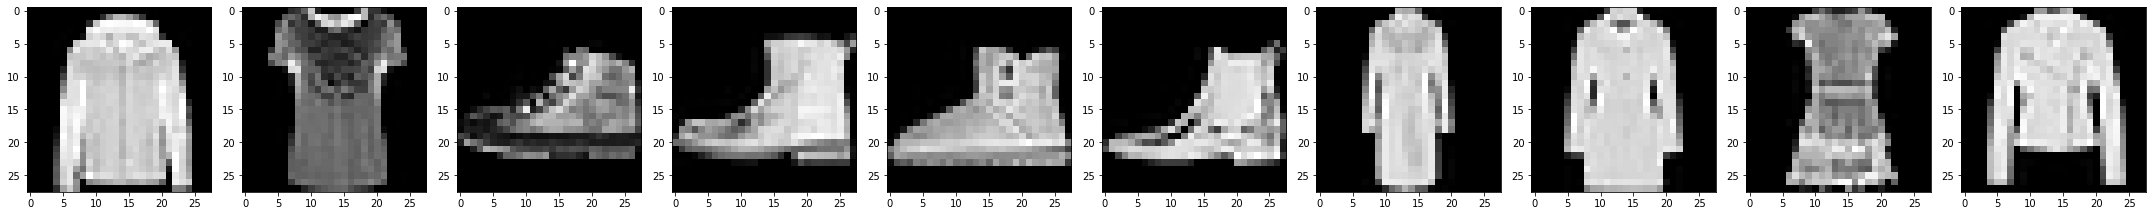

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(30, 10))
for i in range(10):
    ax[i].imshow(X_train[i], cmap='gray')
    #ax[i].title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

### Le perceptron MultiCouche

In [25]:
model = keras.models.Sequential()

In [26]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [27]:
model.add(keras.layers.Dense(300, activation="relu"))

In [28]:
model.add(keras.layers.Dense(100, activation = "relu"))

In [29]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers

In [32]:
hidden1 = model.layers[1]
model.get_layer('dense') is hidden1

True

In [33]:
hidden1.name

'dense'

In [34]:
weights, biais = hidden1.get_weights()

In [35]:
weights.shape

(784, 300)

In [36]:
biais.shape

(300,)

In [37]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
keras.utils.to_categorical(y_train).max()

1.0

In [39]:
y_train.max()

9

In [40]:
y_train.argmax()

3

In [41]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7105 - accuracy: 0.7661 - val_loss: 0.5109 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4816 - accuracy: 0.8335 - val_loss: 0.4361 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8478 - val_loss: 0.4194 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8557 - val_loss: 0.3972 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8637 - val_loss: 0.3944 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8670 - val_loss: 0.3682 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8722 - val_loss: 0.3613 - val_accuracy:

## Building a Machine Learning (Artificial Neural Network) Model - Python Data Science Intro Project

source : https://www.youtube.com/watch?v=8zwILUzux6o

In [42]:
import os

In [43]:
os.getcwd()

'/home/blanchard/Documents/Deep-learning1'

In [45]:
os.chdir('/home/blanchard/Documents/datasets')

## Description about dataset on kaggle

* Classification des Champignons (Teneur de toxicité des chapignons)
* Découvrez quelles caractéristiques entraînent une mort certaine et lesquelles sont les plus acceptables dans cet ensemble de données sur les caractéristiques des champignons
* Cet ensemble de données comprend des descriptions d'échantillons hypothétiques correspondant à 23 espèces de champignons à branchies dans les champignons de la famille Agaricus et Lepiota sur les champignons nord-américains (1981). 
* Chaque espèce est identifiée comme définitivement comestible, définitivement vénéneuse, ou de comestible inconnue et non recommandée. 

* Période : Donné à l'UCI ML 27 avril 1987


### À propos de ce fichier

Informations sur les attributs : (classes : comestible=e, toxique=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knotbed=k,sunken=s

* surface du capuchon : fibreux=f,rainures=g,écailleux=y,lisse=s

* cap-color: marron=n,buff=b,cannelle=c,gris=g,vert=r,rose=p,violet=u,rouge=e,blanc=w,jaune=y

* contusions : contusions=t, non=f

* odeur : amande=a,anis=l,créosote=c,poisson=y,foul=f,moisis=m,aucun=n,piquant=p,épicé=s

* gill-attachment : attaché=a,descendant=d,libre=f,encoche=n

* espacement des branchies : close=c,crowded=w,distant=d

* taille des branchies : large =b, étroite =n

* Gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow= oui

* forme de la tige : enlargement=e,tapering=t

* tige-racine: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* surface de la tige au-dessus de l'anneau : fibreux=f,écailleux=y,soyeux=k,lisse=s

* tige-surface-sous-anneau : fibreux=f,écailleux=y,soyeux=k,lisse=s

* tige-couleur-au-dessus-anneau: marron=n,buff=b,cannelle=c,gris=g,orange=o,rose=p,rouge=e,blanc=w,jaune=y

* tige-couleur-sous-anneau : marron=n,buff=b,cannelle=c,gris=g,orange=o,rose=p,rouge=e,blanc=w,jaune=y

* veil-type: partial=p,universal=u

* voile-couleur: marron=n,orange=o,blanc=w,jaune=y

* numéro de sonnerie : aucun=n,un=o,deux=t

* type d'anneau : toile d'araignée=c,évanescent=e,flaring=f,large=l,aucun=n,pendentif=p,gainage=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abondante=a,groupée=c,nombreuse=n,éparpillée=s,plusieurs=v,solitaire=y

* habitat : graminées=g,feuilles=l,prés=m,chemins=p,urbain=u,déchets=w,bois=d

* class 